**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

# **Xgboost Algorithm**

The [Xgboost](https://xgboost.readthedocs.io/en/release_0.90/) is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

#### **Task:**   
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.


### **Dataset available on:** [Kaggle Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  , [IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

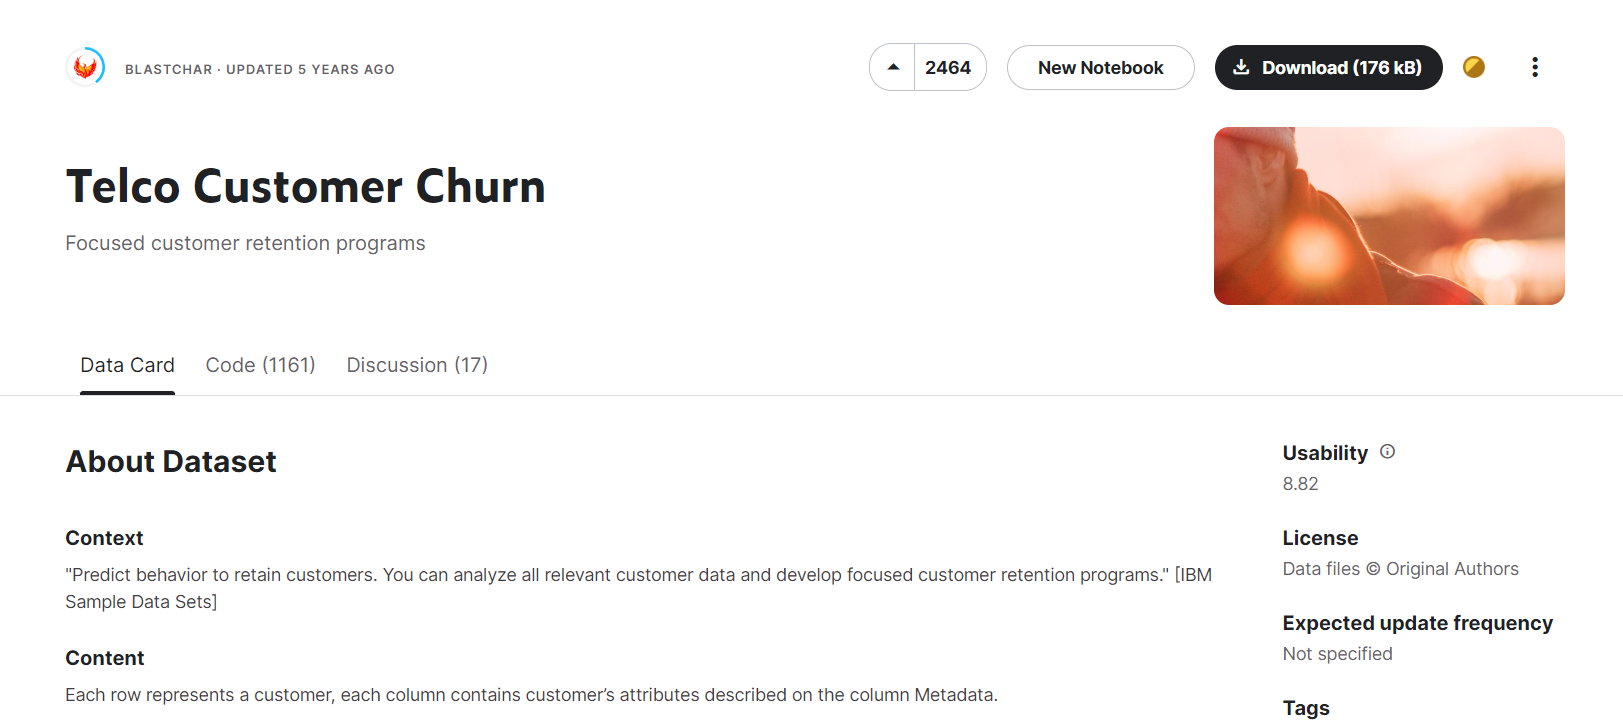

### **Imports**

In [1]:
import pandas as pd # wrangling the data
from sklearn.preprocessing import MinMaxScaler # standardising the data
from sklearn.model_selection import train_test_split # split the dataset into training and test set
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encoding the data in to numerical values from strings
from xgboost import XGBClassifier  # the XGBoost the algorithm classifier
from numpy import loadtxt
from xgboost import plot_importance # plot the most important features
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
from sklearn.model_selection import GridSearchCV # cross validation and parameter tuning
from sklearn.metrics import classification_report # summary report or the metrics

### **Loading the database**

#### **Read the csv file and study the database**

In [2]:
# read the data using pandas
Telco_Customer_churn = pd.read_csv('/content/Telco-Customer-Churn.csv', dtype = str)

#### **Basic EDA**

In [3]:
# display the first five rows using the head function
Telco_Customer_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [4]:
# show the column names
Telco_Customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# shape of the data
Telco_Customer_churn.shape

(7043, 21)

In [6]:
# check for missing values
Telco_Customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# check data types
Telco_Customer_churn.dtypes

customerID          object
gender              object
SeniorCitizen       object
Partner             object
Dependents          object
tenure              object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [8]:
# create a copy of the dataset for visualization purpose
default_df = Telco_Customer_churn.copy()
default_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# show the distribution of the data
Telco_Customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

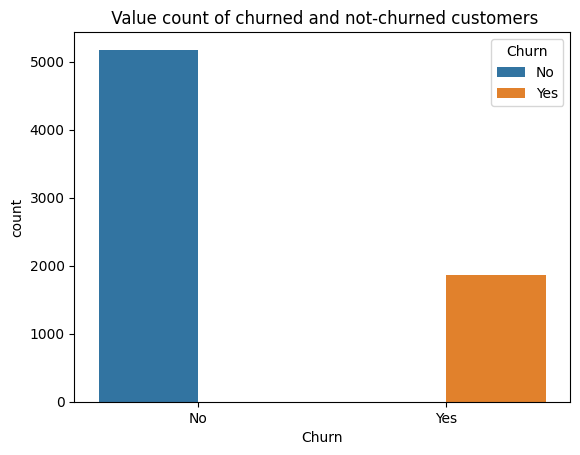

In [10]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=default_df, x="Churn", hue="Churn").set(title = " Value count of churned and not-churned customers");

In [11]:
# show the distribution of the data based on gender to see if there's an imbalance
Telco_Customer_churn['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

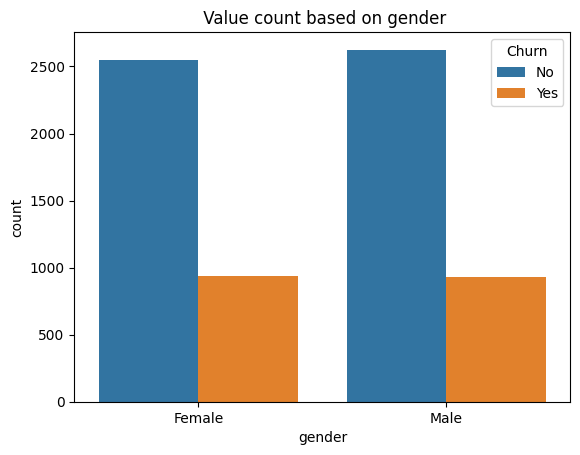

In [12]:
# value count based on gender
sns.countplot(data=default_df, x="gender", hue="Churn").set(title = " Value count based on gender");

## **Preprocessing and feature engineering:**

#### **Define the target and the inputs**

In [13]:
# change the churn values from {Yes , No} to {0 , 1} to represent the values
Telco_Customer_churn['Churn'] = Telco_Customer_churn['Churn'].str.replace('No','0')
Telco_Customer_churn['Churn'] = Telco_Customer_churn['Churn'].str.replace('Yes','1')
# convert the Churn column from string to numeric
Telco_Customer_churn['Churn'] = Telco_Customer_churn['Churn'].astype(int)
Telco_Customer_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1


In [14]:
# get dummies variables of the object variables
Telco_Customer_churn_dummies = pd.get_dummies(Telco_Customer_churn,
                                         columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], drop_first=True)

# output
Telco_Customer_churn_dummies.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.3,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.7,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [15]:
# convert the tenure, MonthlyCharges and TotalCharges
Telco_Customer_churn_dummies['tenure'] = Telco_Customer_churn_dummies['tenure'].astype(int)
Telco_Customer_churn_dummies['MonthlyCharges'] = Telco_Customer_churn_dummies['MonthlyCharges'].astype(float)

# cleaning the strings of the TotalCharges column and replacing it to float values
Telco_Customer_churn_dummies['TotalCharges'] = Telco_Customer_churn_dummies['TotalCharges'].str.replace('','0')
Telco_Customer_churn_dummies['TotalCharges'] = Telco_Customer_churn_dummies['TotalCharges'].str.replace('0 0','0')
Telco_Customer_churn_dummies['TotalCharges'] = Telco_Customer_churn_dummies['TotalCharges'].astype(float)

In [16]:
# once more check data types
#Telco_Customer_churn_dummies.dtypes

In [17]:
# drop useless column such as customerID and assign to new dataframe call
Telco_Customer_churn_new = Telco_Customer_churn_dummies.drop('customerID', axis = 1)

#### **Create a training and a testing dataset**

In [18]:
# this function takes in the dataset encode it and train_split the values Telco_Customer_churn_new
def encode_and_split(Telco_Customer_churn_new):
    loan_data_dumm = pd.get_dummies(Telco_Customer_churn_new, prefix_sep='_', drop_first=True)

    x =  Telco_Customer_churn_new.drop(['Churn'], axis = 1 ) # drop the target column
    y =  Telco_Customer_churn_new['Churn'] # value to be predicted


    # train_test split
    x_train, x_test, y_train, y_test = train_test_split(x, # independent or x values
                                                    y, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 365, # for reproducibility
                                                    stratify = y   # get a balance both in the training and test set
                                                      )

    return x_train, x_test, y_train, y_test

In [19]:
#run encode and split
x_train, x_test, y_train, y_test = encode_and_split(Telco_Customer_churn_new)

#### **Check the result from the stratification**

In [20]:
#get training shape
print("Training Features Shape", x_train.shape)
print("Training Label Rows", y_train.count())

Training Features Shape (5634, 30)
Training Label Rows 5634


In [21]:
#get testing shape
print("Testing Features Shape", x_test.shape)
print("Testing Label Rows", y_test.count())

Testing Features Shape (1409, 30)
Testing Label Rows 1409


In [22]:
#check class distribution
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.734647
1    0.265353
Name: Churn, dtype: float64
0    0.734564
1    0.265436
Name: Churn, dtype: float64


### **Rescaling the data**

**In order for the SVC to work correctly the inputs need to be rescaled to the range(-1,1)**

In [23]:
scaling = MinMaxScaler(feature_range = (-1,1)).fit(x_train) # scaling the training set
x_train_rescaled = scaling.transform(x_train) # transform the scaled data

### **Classify using the Xgboost model:**

In [24]:
# instantiate the model
xgb_model = XGBClassifier(objective='binary:logistic', random_state=0,
                          base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1,gamma=0,gpu_id=-1,
                          importance_type='gain', interaction_constraints='',
                          learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                          min_child_weight=1,monotone_constraints='()',
                          n_estimators=100,n_jobs=0,num_parallel_tree=1,
                          reg_alpha=0, reg_lambda=1,scale_pos_weight=1,subsample=1,
                          tree_method='exact',validate_parameters=1,verbosity=None
                          )

**Fit the model:**

In [25]:
%%time
xgb_model.fit(x_train_rescaled, y_train) # fit the model on the x_train_rescaled

CPU times: user 1.81 s, sys: 17.1 ms, total: 1.83 s
Wall time: 1.02 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor=None,
              random_state=0, ...)

### **Plot the features according to importance**:

**Feature importance on the Unscaled data:**

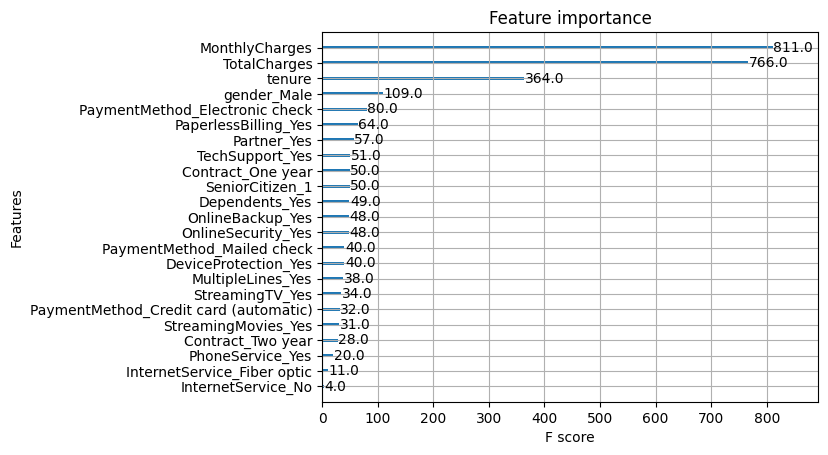

In [26]:
 # note this is the feature importance on the unscaled dataset
 xgb_model.fit(x_train, y_train)
 plot_importance(xgb_model) #plot importance function
 plt.show() # plt.show from matplotlib

**Feature importance on the scaled data:**

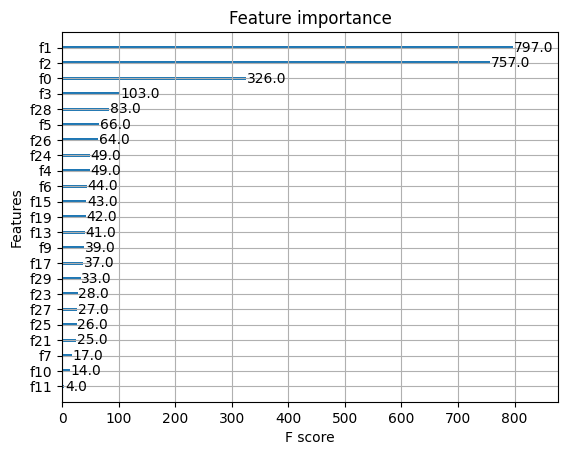

In [27]:
 # note this is the feature importance on the unscaled dataset
 xgb_model.fit(x_train_rescaled, y_train)
 plot_importance(xgb_model) #plot importance function
 plt.show() # plt.show from matplotlib

**Let us predict the above model using the .predict() method:**

In [28]:
y_preds = xgb_model.predict(scaling.transform(x_test)) # predict test transform

y_preds

array([0, 0, 0, ..., 0, 0, 0])

### **Define a separate encoder for the target and the inputs**

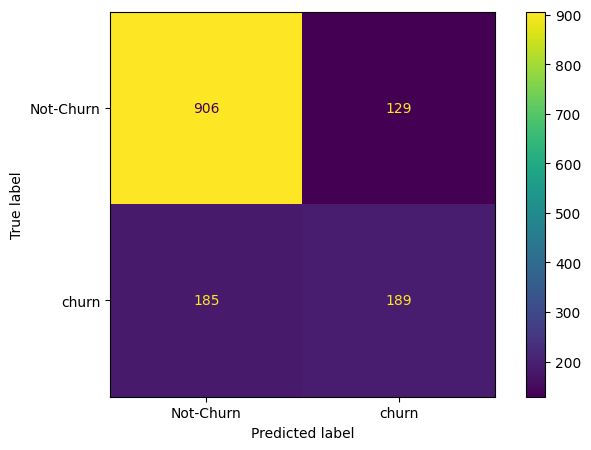

In [29]:
# display the confusionMatrix
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_preds),
    display_labels=['Not-Churn', "churn"]
)

cmp.plot(ax=ax);

In [30]:
# print a summary classification_report
print(classification_report(y_test, y_preds, target_names = ['Churn', "Not-churn"]))

              precision    recall  f1-score   support

       Churn       0.83      0.88      0.85      1035
   Not-churn       0.59      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



### **Now over to you find a dataset and apply the Xgboost Algorithm, with a bit of hyperparameter tuning using GridSearchCV: GOOD LUCK!**